# Travel Review Rating

## Usecase & Description

We are using this Dataset to determine and categorize the Users Reviews on the different type of locations and potentially target the user based on location for positive review and travel opportunities.

We have combined the Travel Review Dataset with a Synthetic User Data that is generated to simulate the Real Problem & Statistical Analysis

#### 1. Install & Import Required Libraries

##### Install Required Python Libraries if not exists

In [158]:
!pip install faker pandas numpy matplotlib seaborn scikit-learn ucimlrepo scipy IPython --quiet

##### Importing libraries

In [159]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ucimlrepo import fetch_ucirepo 
import warnings
import scipy.stats as stats
from faker import Faker
import os
import random
import pandas as pd
from datetime import datetime
from scipy.stats import skew, norm 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


#### 2. Data Aquisition from UCI - Repository

##### Fetch Data from UCI ML Repository regarding Travel Reviews

In [160]:

print(f""" Output Timestamp: {datetime.now()} \n""")

# fetch dataset 
travel_review_ratings = fetch_ucirepo(id=485) 
  
# data (as pandas dataframes) 
X = travel_review_ratings.data.features 
y = travel_review_ratings.data.targets 

# variable information 
display(travel_review_ratings.variables) 


 Output Timestamp: 2025-06-20 21:51:02.207865 



,name,role,type,demographic,description,units,missing_values
0,userid,ID,Categorical,None,None,None,no
1,churches,Feature,Continuous,None,None,None,no
2,resorts,Feature,Continuous,None,None,None,no
3,beaches,Feature,Integer,None,None,None,no
4,parks,Feature,Continuous,None,None,None,no
5,theatres,Feature,Continuous,None,None,None,no
6,museums,Feature,Continuous,None,None,None,no
7,malls,Feature,Continuous,None,None,None,no
8,zoos,Feature,Continuous,None,None,None,no
9,restaurants,Feature,Integer,None,None,None,no


##### Display the Data from Dataframe

In [162]:
print(f""" Output Timestamp: {datetime.now()} \n""")
## Convert the UCI ML Repo dataset to a pandas DataFrame
df_travel_review_ratings = travel_review_ratings.data.original
display(df_travel_review_ratings)

 Output Timestamp: 2025-06-20 21:53:14.252692 



,userid,churches,resorts,beaches,parks,theatres,museums,malls,zoos,restaurants,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


#### 3. Generate User Demographics Data using Python Faker Library if the Data doesn't exist Locally

##### Check if the User Demographics Data/File exist locally. If Not, Generate Data else read the file into DataFrame

In [165]:


print(f""" Output Timestamp: {datetime.now()} \n""")
# Check if the file exists
if not os.path.exists('all_users.csv'):

    fake = Faker()
    num_users = 6000
    countries = ['US', 'UK', 'IN']
    genders = ['Male', 'Female']

    data = []
    for i in range(1, num_users + 1):
        first_name = fake.first_name()
        last_name = fake.last_name()
        email = fake.email()
        user = {
            'userid': f'User {i}',
            'first_name': first_name,
            'last_name': last_name,
            'email': email,
            'age': random.randint(18, 80),
            'gender': random.choice(genders),
            'country': random.choice(countries)
        }
        data.append(user)

    df_fake_users = pd.DataFrame(data)
    df_fake_users.to_csv('all_users.csv', index=False)
    print("all_users.csv generated.")
else:
    print("all_users.csv already exists.")
    df_user_demographics = pd.read_csv('all_users.csv', sep=',')
    display(df_user_demographics)

 Output Timestamp: 2025-06-20 21:53:43.389396 

all_users.csv already exists.


,userid,first_name,last_name,email,age,gender,country
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK
...,...,...,...,...,...,...,...
5995,User 5996,Walter,Smith,marshalljohn@example.com,78,Female,US
5996,User 5997,Victor,Jones,emilygardner@example.net,61,Female,IN
5997,User 5998,Michael,Aguilar,uoliver@example.org,32,Female,US
5998,User 5999,Jamie,Smith,cynthiatrujillo@example.com,69,Male,US


#### 4. Combine User Demographics Data with Travel Review Ratings

In [166]:
print(f""" Output Timestamp: {datetime.now()} \n""")
df_user_travel_reviews = pd.merge(df_user_demographics, df_travel_review_ratings, on='userid', how='inner')
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-20 21:55:08.690850 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US,0.0,0.0,3.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US,0.0,0.0,3.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK,0.0,0.0,3.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK,0.0,0.5,3.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK,0.0,0.0,3.63,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


##### Categorize the Age in DataFrame in Youth, Adult & Senior

In [167]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Define a function to categorize age
def categorize_age(age):
    if age < 18:
        return 'Youth'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new column
df_user_travel_reviews['age_group'] = df_user_travel_reviews['age'].apply(categorize_age)
display(df_user_travel_reviews.head())


 Output Timestamp: 2025-06-20 21:55:12.505874 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,age_group
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US,0.0,0.0,3.63,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Senior
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US,0.0,0.0,3.63,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Adult
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK,0.0,0.0,3.63,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Senior
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK,0.0,0.5,3.63,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Senior
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK,0.0,0.0,3.63,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Adult


##### Add Columns as Average Rating by Each Category

In [168]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Define column groups
natural_space_cols = ['parks', 'beaches', 'gardens', 'view points', 'monuments']
entertainment_cols = ['theatres', 'dance clubs', 'pubs/bars', 'zoos', 'resorts', 'swimming pools','malls'
                      ,'hotels/other lodgings',
                      'gyms','beauty & spas']
food_space_cols = ['restaurants', 'burger/pizza shops', 'juice bars', 'cafes', 'bakeries']
art_related_cols = ['museums', 'art galleries', 'churches','local services']

# Convert relevant columns to numeric (safely)
for col in natural_space_cols + entertainment_cols + art_related_cols:
    df_user_travel_reviews[col] = pd.to_numeric(df_user_travel_reviews[col], errors='coerce')

# Function to calculate mean ignoring 0 and NaN
def custom_mean(series):
    valid = series[(series != 0) & (~series.isna())]
    return valid.mean() if not valid.empty else np.nan

# Apply custom mean per row
df_user_travel_reviews['avg_natural_space'] = df_user_travel_reviews[natural_space_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_entertainment'] = df_user_travel_reviews[entertainment_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_art_related'] = df_user_travel_reviews[art_related_cols].apply(custom_mean, axis=1)
df_user_travel_reviews['avg_food_spaces'] = df_user_travel_reviews[food_space_cols].apply(custom_mean, axis=1)

display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-20 21:55:46.409349 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.540000,2.12,1.56
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.582857,2.12,1.56
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.581429,2.12,1.56
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK,0.0,0.5,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 5. Exploratory Data Analysis

##### Perform the descriptive Statistics on the Dataframe

In [169]:
print(f""" Output Timestamp: {datetime.now()} \n""")
## Perform Descriptive Statistics on the DataFrame
## We can see 
display(df_user_travel_reviews.describe(include='all'))

 Output Timestamp: 2025-06-20 21:55:56.755947 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
count,5456,5456,5456,5456,5456.000000,5456,5456,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456,5456.000000,5456.000000,5456.00000,5456.000000
unique,5456,613,928,5395,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,User 1,Michael,Smith,osmith@example.net,NaN,Male,US,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN
freq,1,126,125,6,NaN,2787,1851,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3710,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,48.556268,NaN,NaN,1.455720,2.319707,2.489331,...,1.000071,0.965838,1.750537,1.531453,1.560755,NaN,2.082796,2.127986,2.30015,2.006793
std,NaN,NaN,NaN,NaN,18.093285,NaN,NaN,0.827604,1.421438,1.247815,...,1.193891,0.929853,1.598734,1.316889,1.171756,NaN,0.814292,0.424924,0.54220,0.639361
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.716000,1.232000,1.12500,0.732000
25%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,...,0.540000,0.570000,0.740000,0.790000,0.880000,NaN,1.443000,1.807944,1.86000,1.604750
50%,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,1.340000,1.905000,2.060000,...,0.690000,0.760000,1.030000,1.070000,1.290000,NaN,1.953000,2.097000,2.33500,1.916000
75%,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,1.810000,2.682500,2.740000,...,0.860000,1.000000,2.070000,1.560000,1.660000,NaN,2.614500,2.420000,2.61500,2.395250


##### Data Cleaning based on Null / Duplicate values and then check the descriptive statistics

 Output Timestamp: 2025-06-20 21:56:02.492109 

Missing values per column:
 local services        1
burger/pizza shops    1
gardens               1
dtype: int64

Data types:
 userid                    object
first_name                object
last_name                 object
email                     object
age                        int64
gender                    object
country                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoos                     float64
restaurants              float64
pubs/bars                float64
local services           float64
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64


,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
count,5454,5454,5454,5454,5454.000000,5454,5454,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454,5454.000000,5454.000000,5454.000000,5454.000000
unique,5454,613,928,5393,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,User 1,Michael,Smith,osmith@example.net,NaN,Male,US,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Adult,NaN,NaN,NaN,NaN
freq,1,126,125,6,NaN,2786,1850,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3708,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,48.563073,NaN,NaN,1.455746,2.320048,2.489059,...,0.999626,0.965275,1.749345,1.531051,1.560570,NaN,2.082383,2.127937,2.299925,2.006445
std,NaN,NaN,NaN,NaN,18.092615,NaN,NaN,0.827732,1.421576,1.247503,...,1.193129,0.928326,1.597816,1.316180,1.171784,NaN,0.814149,0.424715,0.542143,0.638812
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.716000,1.232000,1.125000,0.732000
25%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,0.920000,1.360000,1.540000,...,0.540000,0.570000,0.740000,0.790000,0.880000,NaN,1.442333,1.808000,1.860000,1.604250
50%,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,1.340000,1.910000,2.060000,...,0.690000,0.760000,1.030000,1.070000,1.290000,NaN,1.952000,2.097000,2.335000,1.916000
75%,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,1.810000,2.687500,2.740000,...,0.860000,1.000000,2.070000,1.560000,1.660000,NaN,2.614000,2.420000,2.615000,2.394750



Value counts for gender:
gender
Male      2786
Female    2668
Name: count, dtype: int64

Value counts for country:
country
US    1850
IN    1812
UK    1792
Name: count, dtype: int64


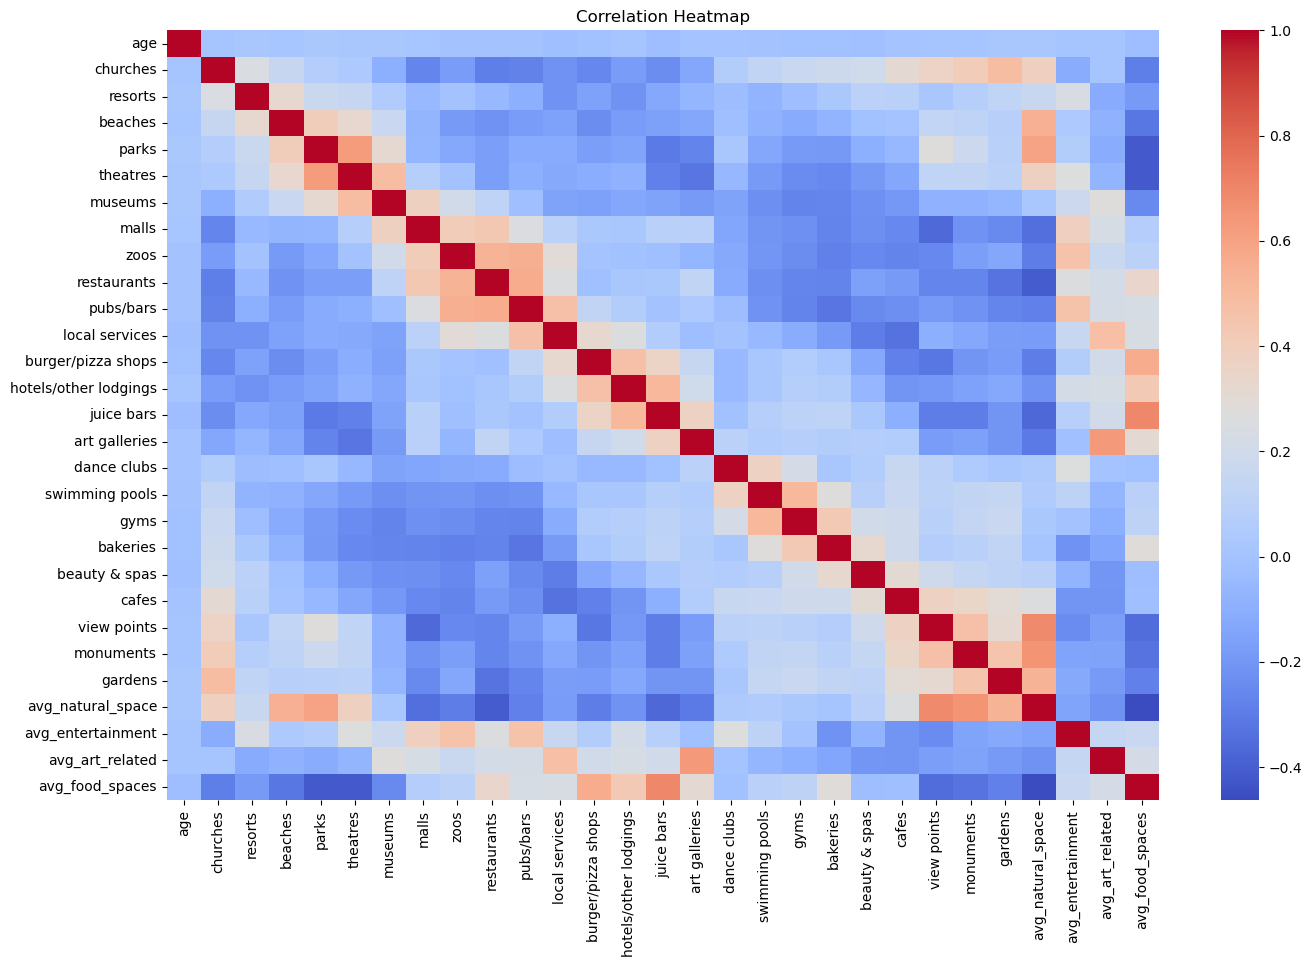

In [170]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Exploratory Data Analysis (EDA) and Cleanup for df_user_travel_reviews

# 1. Check for missing values
missing_counts = df_user_travel_reviews.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

# 2. Drop rows with missing values (if any)
df_user_travel_reviews_clean = df_user_travel_reviews.dropna().reset_index(drop=True)

# 3. Check data types
print("\nData types:\n", df_user_travel_reviews_clean.dtypes)

# 4. Check for duplicates
duplicates = df_user_travel_reviews_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 5. Drop duplicates if any
df_user_travel_reviews_clean = df_user_travel_reviews_clean.drop_duplicates().reset_index(drop=True)

# 6. Basic statistics
display(df_user_travel_reviews_clean.describe(include='all'))

# 7. Value counts for categorical columns
for col in ['gender', 'country']:
    print(f"\nValue counts for {col}:")
    print(df_user_travel_reviews_clean[col].value_counts())

# 8. Correlation heatmap for numeric columns
plt.figure(figsize=(16, 10))
sns.heatmap(df_user_travel_reviews_clean.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 9. Update the main dataframe variable for further analysis
df_user_travel_reviews = df_user_travel_reviews_clean

#### Display the Distribution of data and Some Inferences on it

 Output Timestamp: 2025-06-20 21:56:14.029347 



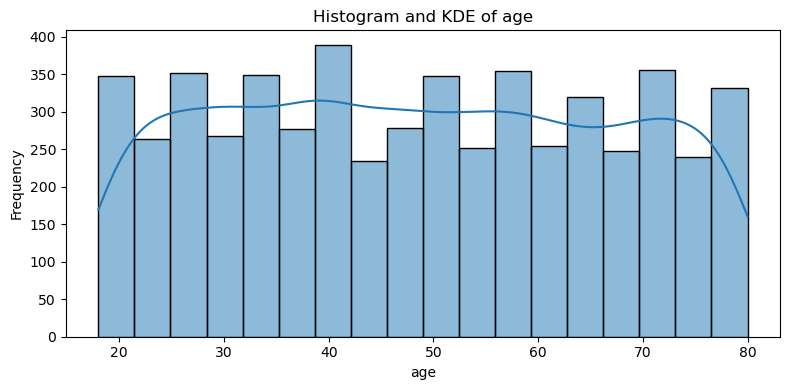

Inference for age:
Skewness: 0.04 → The distribution is approximately symmetric.

- Mean vs Median: 48.56 vs 48.00 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 31.00
- Number of Outliers (1.5*IQR rule): 0


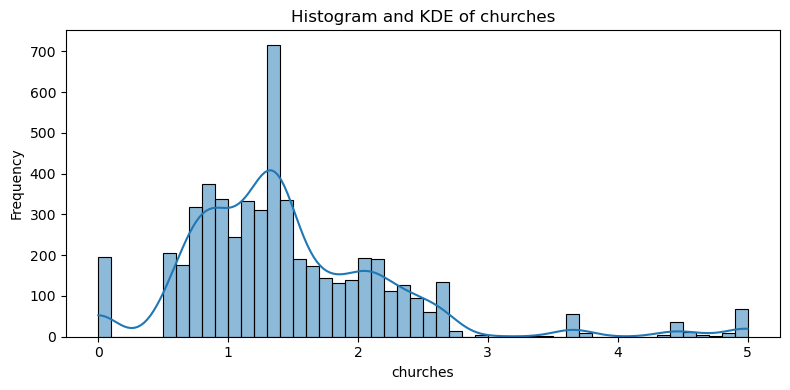

Inference for churches:
Skewness: 1.67 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.46 vs 1.34 → Skewed central tendency.
- IQR (Interquartile Range): 0.89
- Number of Outliers (1.5*IQR rule): 197


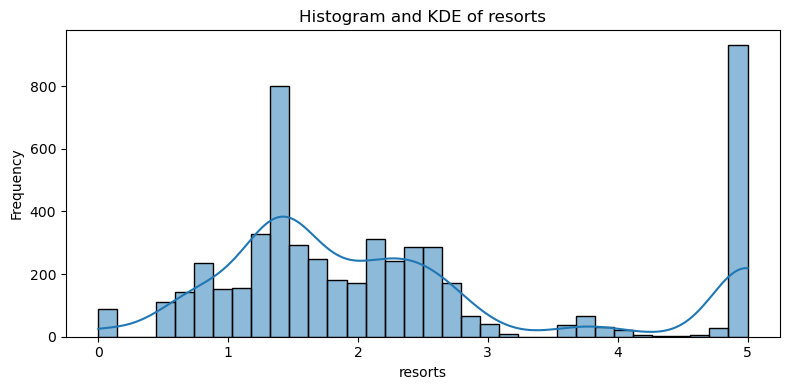

Inference for resorts:
Skewness: 0.88 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.32 vs 1.91 → Skewed central tendency.
- IQR (Interquartile Range): 1.33
- Number of Outliers (1.5*IQR rule): 966


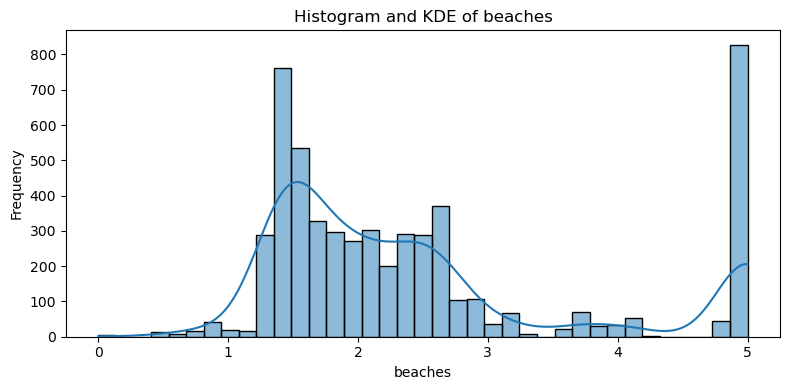

Inference for beaches:
Skewness: 1.09 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.49 vs 2.06 → Skewed central tendency.
- IQR (Interquartile Range): 1.20
- Number of Outliers (1.5*IQR rule): 872


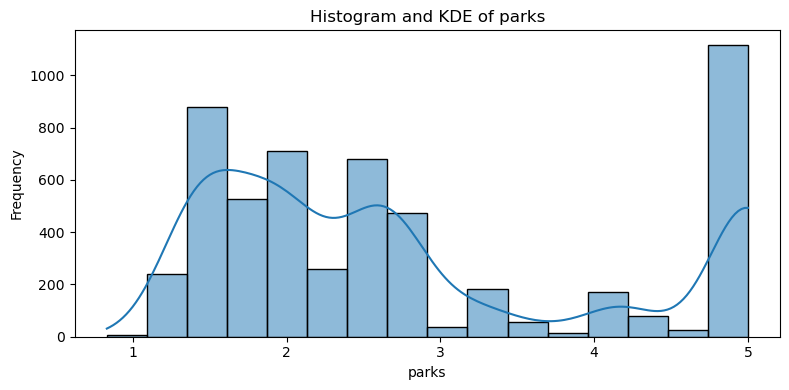

Inference for parks:
Skewness: 0.71 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.80 vs 2.46 → Skewed central tendency.
- IQR (Interquartile Range): 2.37
- Number of Outliers (1.5*IQR rule): 0


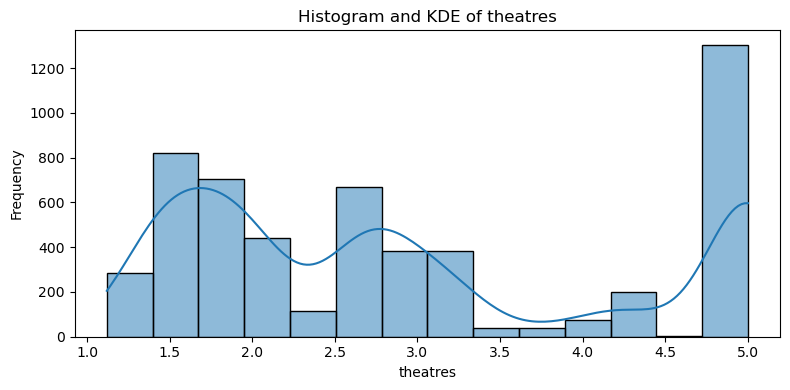

Inference for theatres:
Skewness: 0.49 → The distribution is approximately symmetric.

- Mean vs Median: 2.96 vs 2.67 → Skewed central tendency.
- IQR (Interquartile Range): 2.54
- Number of Outliers (1.5*IQR rule): 0


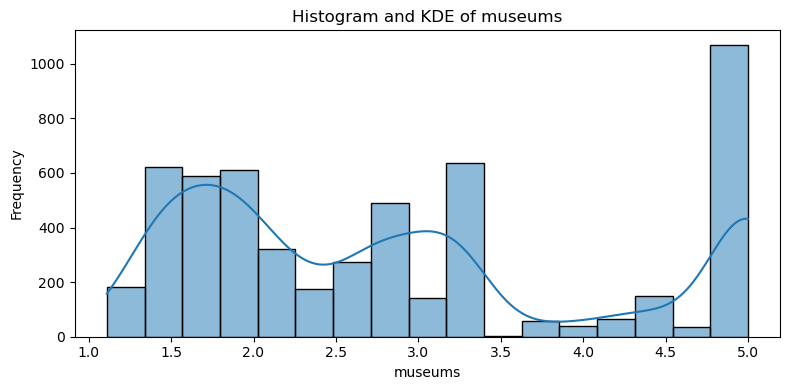

Inference for museums:
Skewness: 0.56 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.89 vs 2.68 → Skewed central tendency.
- IQR (Interquartile Range): 2.05
- Number of Outliers (1.5*IQR rule): 0


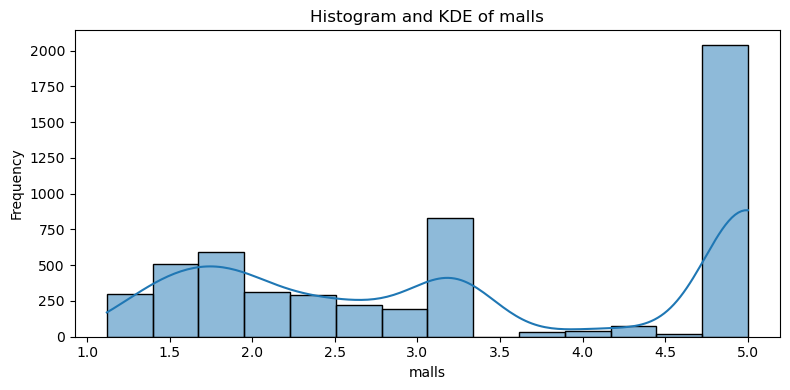

Inference for malls:
Skewness: 0.02 → The distribution is approximately symmetric.

- Mean vs Median: 3.35 vs 3.23 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 3.07
- Number of Outliers (1.5*IQR rule): 0


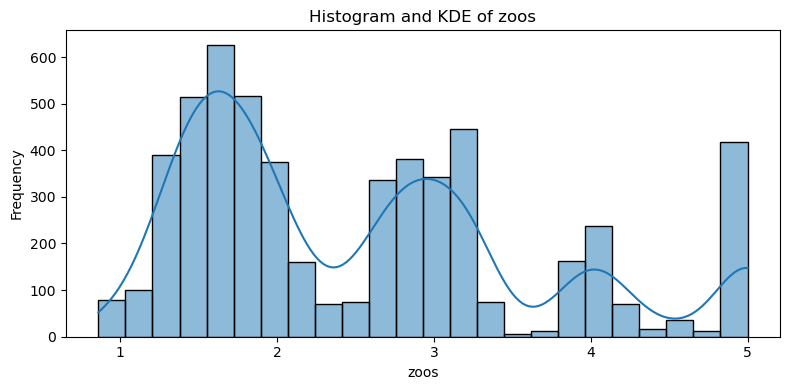

Inference for zoos:
Skewness: 0.77 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.54 vs 2.17 → Skewed central tendency.
- IQR (Interquartile Range): 1.57
- Number of Outliers (1.5*IQR rule): 0


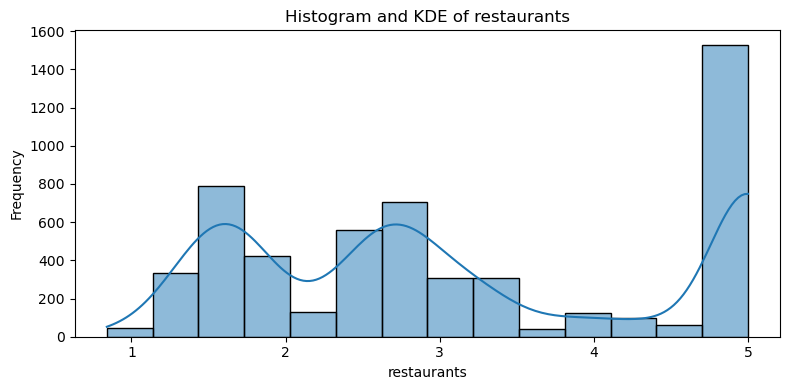

Inference for restaurants:
Skewness: 0.27 → The distribution is approximately symmetric.

- Mean vs Median: 3.13 vs 2.80 → Skewed central tendency.
- IQR (Interquartile Range): 3.20
- Number of Outliers (1.5*IQR rule): 0


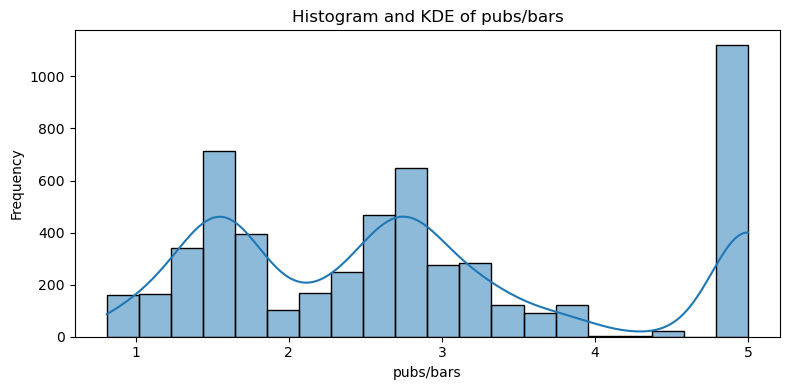

Inference for pubs/bars:
Skewness: 0.52 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.83 vs 2.68 → Skewed central tendency.
- IQR (Interquartile Range): 1.89
- Number of Outliers (1.5*IQR rule): 0


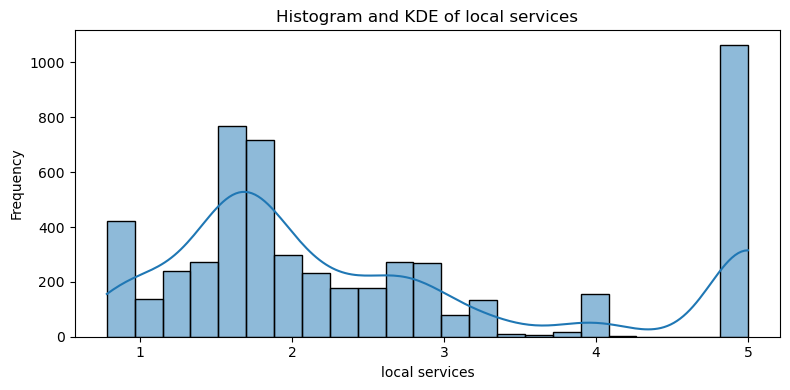

Inference for local services:
Skewness: 0.82 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.55 vs 2.00 → Skewed central tendency.
- IQR (Interquartile Range): 1.64
- Number of Outliers (1.5*IQR rule): 0


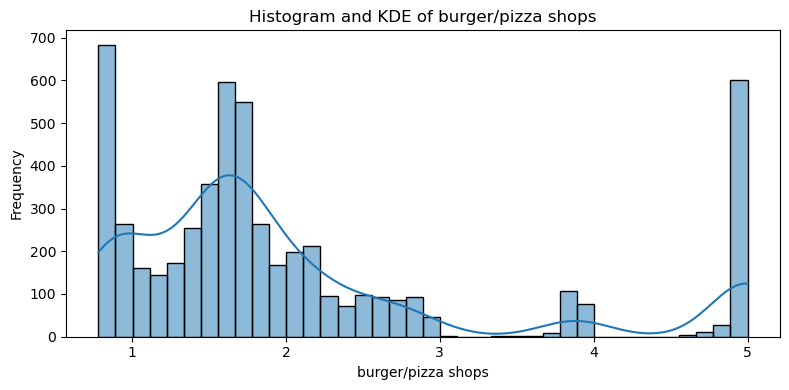

Inference for burger/pizza shops:
Skewness: 1.39 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.08 vs 1.69 → Skewed central tendency.
- IQR (Interquartile Range): 1.00
- Number of Outliers (1.5*IQR rule): 825


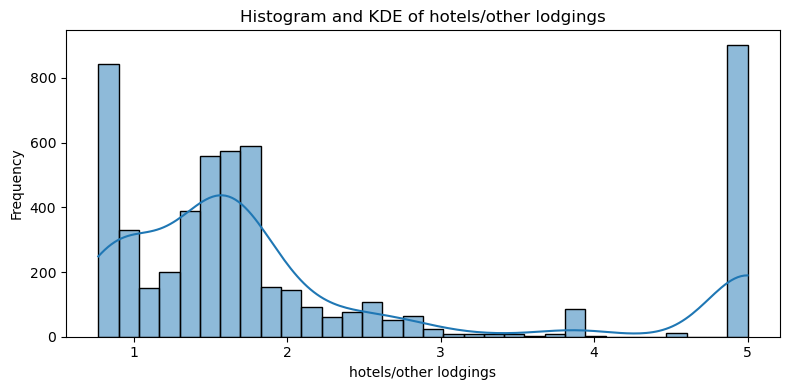

Inference for hotels/other lodgings:
Skewness: 1.26 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.13 vs 1.61 → Skewed central tendency.
- IQR (Interquartile Range): 1.17
- Number of Outliers (1.5*IQR rule): 915


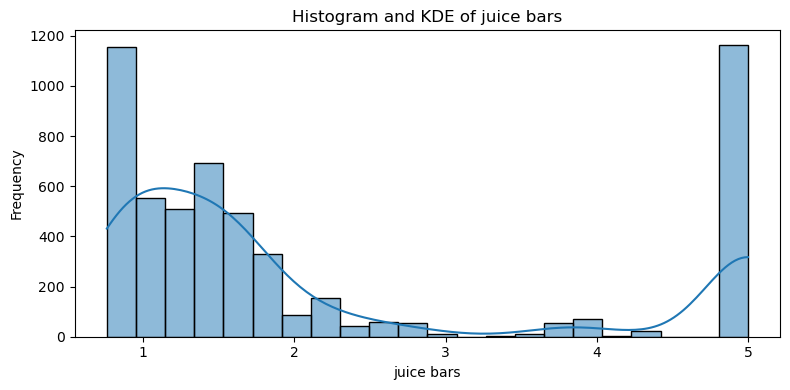

Inference for juice bars:
Skewness: 1.03 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 2.19 vs 1.49 → Skewed central tendency.
- IQR (Interquartile Range): 1.71
- Number of Outliers (1.5*IQR rule): 0


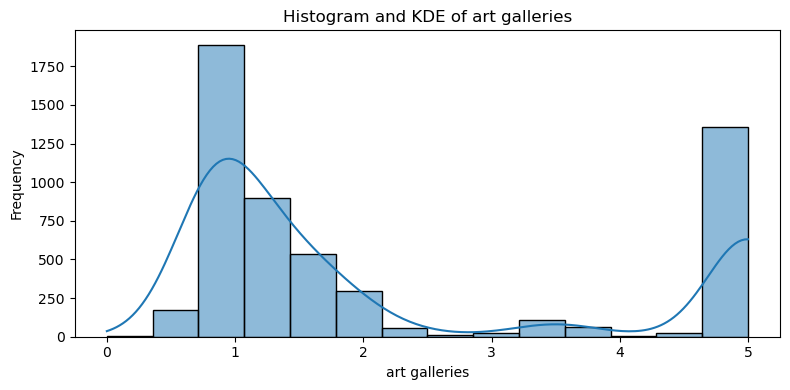

Inference for art galleries:
Skewness: 0.86 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.21 vs 1.33 → Skewed central tendency.
- IQR (Interquartile Range): 3.58
- Number of Outliers (1.5*IQR rule): 0


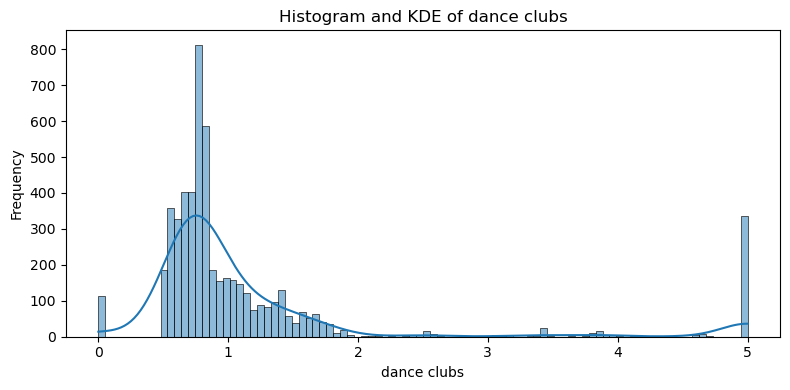

Inference for dance clubs:
Skewness: 2.69 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.19 vs 0.80 → Skewed central tendency.
- IQR (Interquartile Range): 0.47
- Number of Outliers (1.5*IQR rule): 501


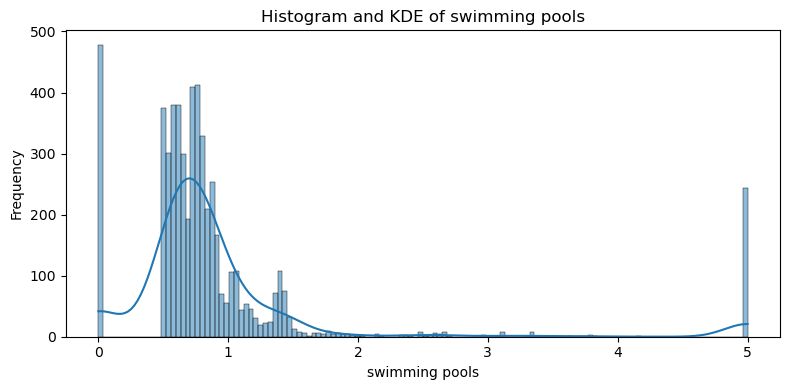

Inference for swimming pools:
Skewness: 3.27 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.95 vs 0.74 → Skewed central tendency.
- IQR (Interquartile Range): 0.33
- Number of Outliers (1.5*IQR rule): 1027


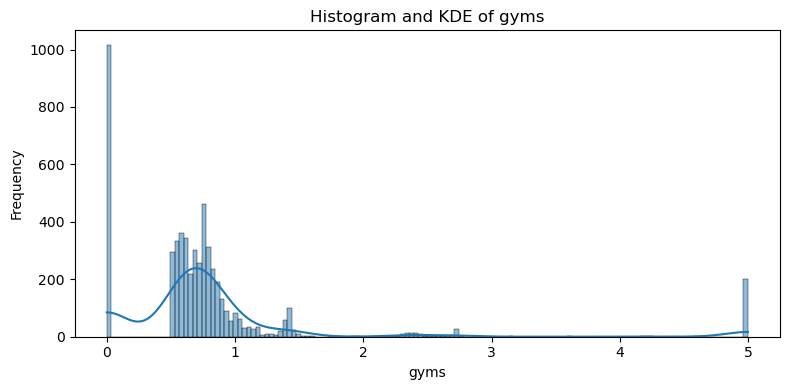

Inference for gyms:
Skewness: 3.28 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.82 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.31
- Number of Outliers (1.5*IQR rule): 1572


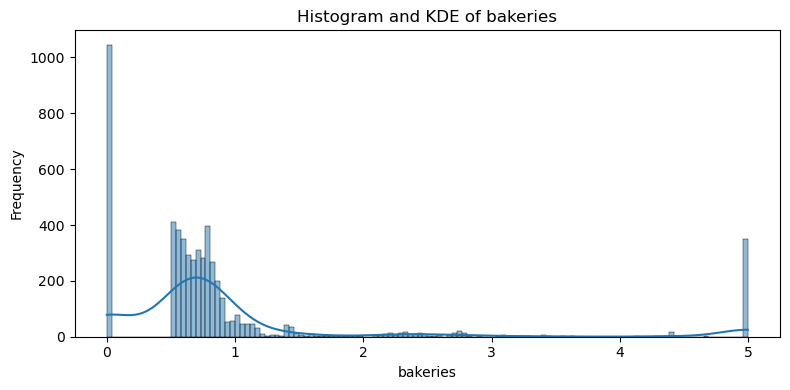

Inference for bakeries:
Skewness: 2.51 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.97 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.34
- Number of Outliers (1.5*IQR rule): 1769


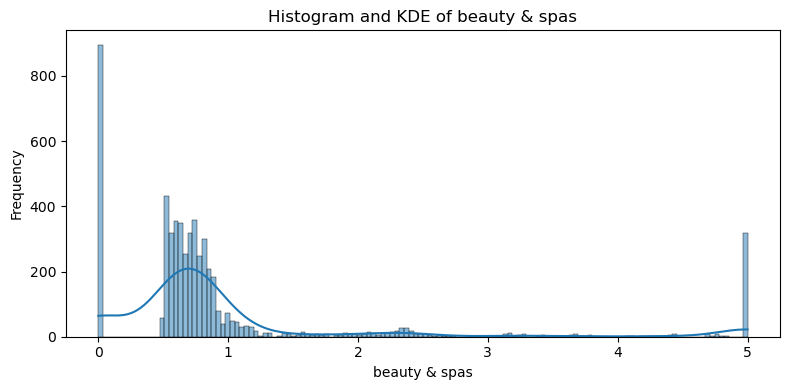

Inference for beauty & spas:
Skewness: 2.47 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.00 vs 0.69 → Skewed central tendency.
- IQR (Interquartile Range): 0.32
- Number of Outliers (1.5*IQR rule): 1653


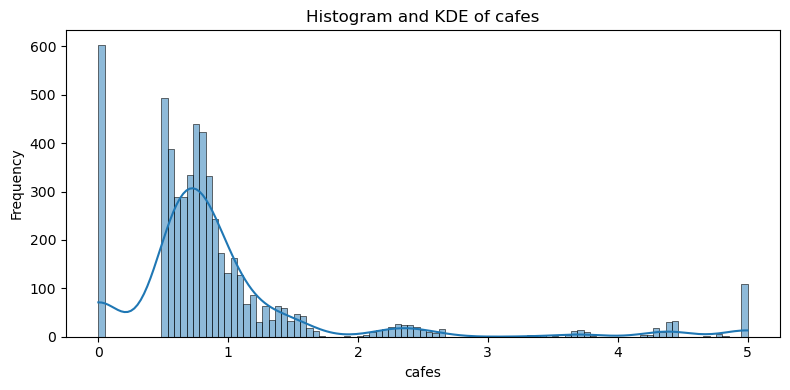

Inference for cafes:
Skewness: 2.82 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 0.97 vs 0.76 → Skewed central tendency.
- IQR (Interquartile Range): 0.43
- Number of Outliers (1.5*IQR rule): 485


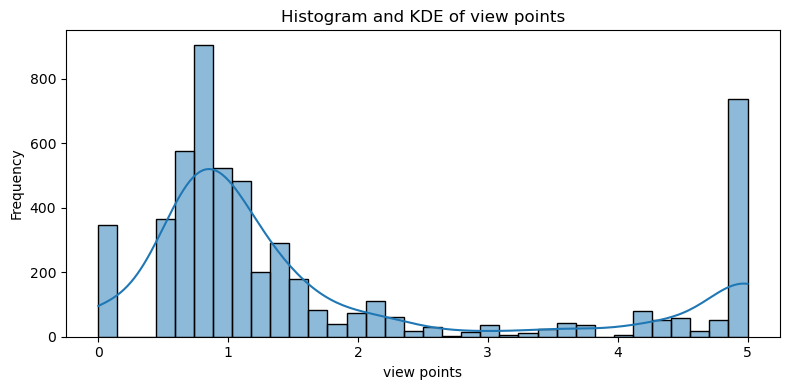

Inference for view points:
Skewness: 1.21 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.75 vs 1.03 → Skewed central tendency.
- IQR (Interquartile Range): 1.33
- Number of Outliers (1.5*IQR rule): 997


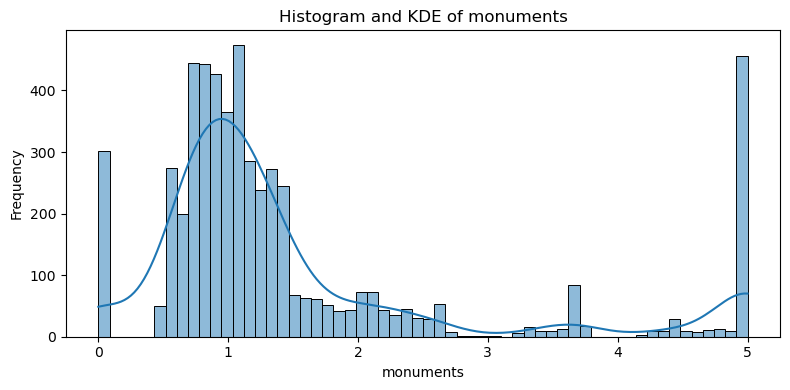

Inference for monuments:
Skewness: 1.71 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.53 vs 1.07 → Skewed central tendency.
- IQR (Interquartile Range): 0.77
- Number of Outliers (1.5*IQR rule): 717


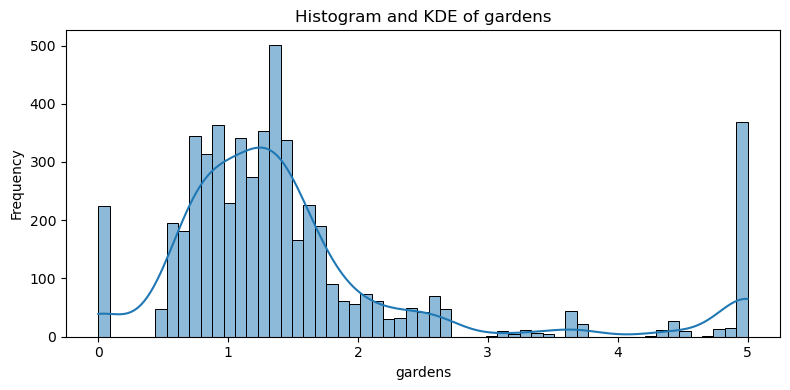

Inference for gardens:
Skewness: 1.87 → The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left.

- Mean vs Median: 1.56 vs 1.29 → Skewed central tendency.
- IQR (Interquartile Range): 0.78
- Number of Outliers (1.5*IQR rule): 548


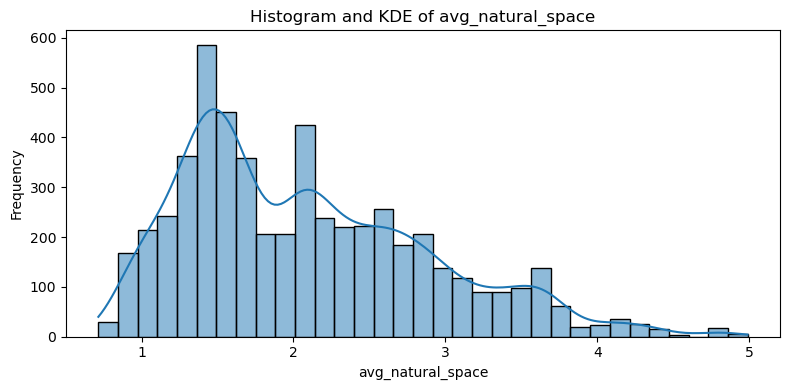

Inference for avg_natural_space:
Skewness: 0.76 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.08 vs 1.95 → Skewed central tendency.
- IQR (Interquartile Range): 1.17
- Number of Outliers (1.5*IQR rule): 36


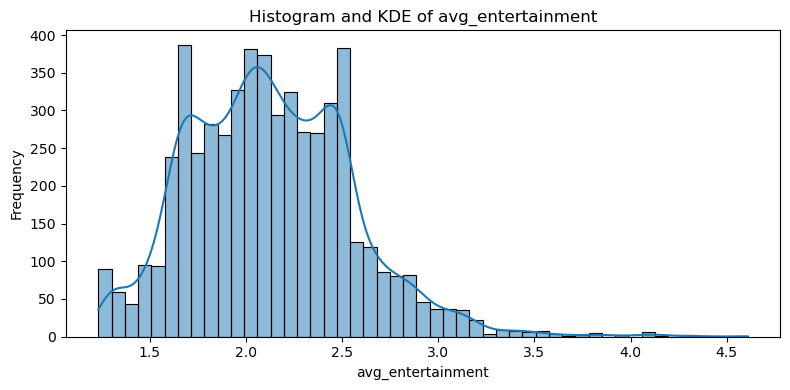

Inference for avg_entertainment:
Skewness: 0.60 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.13 vs 2.10 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 0.61
- Number of Outliers (1.5*IQR rule): 47


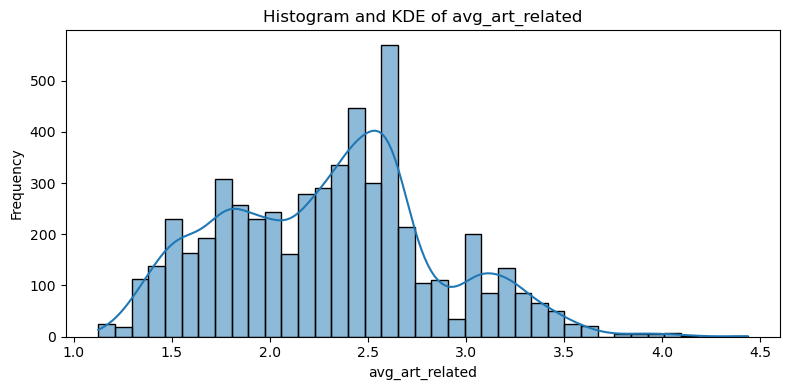

Inference for avg_art_related:
Skewness: 0.24 → The distribution is approximately symmetric.

- Mean vs Median: 2.30 vs 2.33 → Fairly symmetric central tendency.
- IQR (Interquartile Range): 0.76
- Number of Outliers (1.5*IQR rule): 27


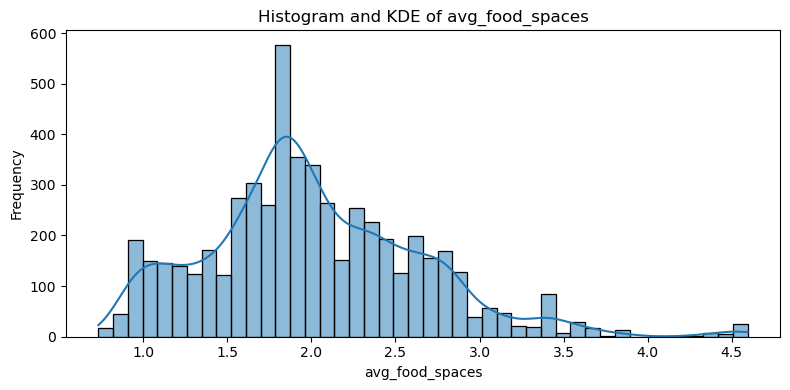

Inference for avg_food_spaces:
Skewness: 0.67 → The distribution is moderately right-skewed (positively skewed).

- Mean vs Median: 2.01 vs 1.92 → Skewed central tendency.
- IQR (Interquartile Range): 0.79
- Number of Outliers (1.5*IQR rule): 94


In [171]:

print(f""" Output Timestamp: {datetime.now()} \n""")

# Plot Histogram and KDE with interpretation
for col in df_user_travel_reviews.select_dtypes(include=['float64', 'int64']).columns:
    data = df_user_travel_reviews[col].dropna()
    
    plt.figure(figsize=(8, 4))
    sns.histplot(data, kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
    # Inference based on skewness
    sk = skew(data)
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    outliers = data[(data < data.quantile(0.25) - 1.5 * iqr) | (data > data.quantile(0.75) + 1.5 * iqr)]

    if sk > 1:
        interpretation = "The distribution is highly right-skewed (positively skewed). Most values are concentrated on the left."
    elif sk > 0.5:
        interpretation = "The distribution is moderately right-skewed (positively skewed)."
    elif sk < -1:
        interpretation = "The distribution is highly left-skewed (negatively skewed). Most values are concentrated on the right."
    elif sk < -0.5:
        interpretation = "The distribution is moderately left-skewed (negatively skewed)."
    else:
        interpretation = "The distribution is approximately symmetric."
    
    print(f"Inference for {col}:\nSkewness: {sk:.2f} → {interpretation}\n")
    print(f"- Mean vs Median: {mean:.2f} vs {median:.2f} →", end=" ")
    if abs(mean - median) < 0.1 * std:
        print("Fairly symmetric central tendency.")
    else:
        print("Skewed central tendency.")
    print(f"- IQR (Interquartile Range): {iqr:.2f}")
    print(f"- Number of Outliers (1.5*IQR rule): {len(outliers)}")


##### Distribution Check - Normal, Gamma, Beta,

In [172]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# === Define distributions to check ===
distributions = ['norm', 'gamma', 'beta']

# === Function to fit distributions and compute KS test ===
def analyze_distribution(series, dists):
    results = []
    data = series.dropna().values
    if len(data) < 10:
        return None  # Skip small samples
    for dist_name in dists:
        dist = getattr(stats, dist_name)
        try:
            params = dist.fit(data)
            D, p = stats.kstest(data, dist_name, args=params)
            results.append((dist_name, D, p))
        except Exception as e:
            continue  # Skip if fitting fails
    return sorted(results, key=lambda x: x[2], reverse=True)  # sort by p-value desc

# === Analyze all numeric columns ===
def analyze_dataframe_distributions(df, dists):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = {}
    for col in numeric_cols:
        print(f"\nAnalyzing column: {col}")
        results = analyze_distribution(df[col], dists)
        if results:
            summary[col] = results
            for dist, D, p in results:
                print(f"  {dist:>8} | KS Stat = {D:.4f} | p = {p:.4f}")
        else:
            print("  Not enough data or fitting failed.")
    return summary

# === Run the analysis ===
distribution_summary = analyze_dataframe_distributions(df_user_travel_reviews, distributions)



 Output Timestamp: 2025-06-20 21:56:37.045058 


Analyzing column: age
      beta | KS Stat = 0.0330 | p = 0.0000
     gamma | KS Stat = 0.0641 | p = 0.0000
      norm | KS Stat = 0.0648 | p = 0.0000

Analyzing column: churches
      beta | KS Stat = 0.0828 | p = 0.0000
     gamma | KS Stat = 0.0839 | p = 0.0000
      norm | KS Stat = 0.1358 | p = 0.0000

Analyzing column: resorts
     gamma | KS Stat = 0.1158 | p = 0.0000
      norm | KS Stat = 0.1530 | p = 0.0000
      beta | KS Stat = 0.3731 | p = 0.0000

Analyzing column: beaches
     gamma | KS Stat = 0.1165 | p = 0.0000
      norm | KS Stat = 0.1787 | p = 0.0000
      beta | KS Stat = 0.3150 | p = 0.0000

Analyzing column: parks
     gamma | KS Stat = 0.1291 | p = 0.0000
      norm | KS Stat = 0.1670 | p = 0.0000
      beta | KS Stat = 0.4697 | p = 0.0000

Analyzing column: theatres
     gamma | KS Stat = 0.1318 | p = 0.0000
      norm | KS Stat = 0.1624 | p = 0.0000
      beta | KS Stat = 0.3259 | p = 0.0000

Analyzing column: m

In [173]:
print(f""" Output Timestamp: {datetime.now()} \n""")
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-20 21:56:44.189359 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.540000,2.12,1.56
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.582857,2.12,1.56
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.581429,2.12,1.56
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK,0.0,0.5,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 6. Check if there is a relation between Gender and user Rating for Churches

##### Null Hypothesis (H0): There is no relationship between Gender and user rating for Churches.
##### Alternate Hypothesis (H1): There is a relationship between Gender and user rating for Churches.

In [174]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

print(f""" Output Timestamp: {datetime.now()} \n""")

# We will perform a t-test to check if there is a significant relationship between Gender and user rating for Churches.
# Extract relevant columns for the t-test

church_ratings_by_gender = df_user_travel_reviews[['gender', 'churches']].dropna()

# Independent t-test
male_group = church_ratings_by_gender[church_ratings_by_gender['gender'] == 'Male']['churches']
female_group = church_ratings_by_gender[church_ratings_by_gender['gender'] == 'Female']['churches']
stat, p_value = ttest_ind(male_group, female_group, equal_var=False)
print(f"T-test statistic: {stat:.4f}, p-value: {p_value:.4e}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Gender and user rating for Churches.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between Gender and user rating for Churches.")

 Output Timestamp: 2025-06-20 21:56:50.092255 

T-test statistic: 0.9204, p-value: 3.5742e-01
Fail to reject the null hypothesis: No significant relationship between Gender and user rating for Churches.


In [175]:
print(f""" Output Timestamp: {datetime.now()} \n""")
display(df_user_travel_reviews.head())

 Output Timestamp: 2025-06-20 21:56:54.155530 



,userid,first_name,last_name,email,age,gender,country,churches,resorts,beaches,...,beauty & spas,cafes,view points,monuments,gardens,age_group,avg_natural_space,avg_entertainment,avg_art_related,avg_food_spaces
0,User 1,Daniel,Young,brentpearson@example.com,68,Female,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.64,2.540000,2.12,1.56
1,User 2,Stacy,Morgan,sarah28@example.com,28,Male,US,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.64,2.582857,2.12,1.56
2,User 3,Brittany,Henry,sheilacuevas@example.com,79,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.581429,2.12,1.56
3,User 4,Christina,Delacruz,ssaunders@example.net,73,Female,UK,0.0,0.5,3.63,...,0.0,0.0,0.0,0.0,0.0,Senior,3.63,2.285000,2.13,1.56
4,User 5,Ronald,Reynolds,jsmith@example.net,40,Male,UK,0.0,0.0,3.63,...,0.0,0.0,0.0,0.0,0.0,Adult,3.63,2.581429,2.12,1.56


#### 7. Determine if the User is overall reviewing only during Positive Experiance or Negative Experiance

##### Adding Column to get the average for all the review ratings from Non-Zero or Valid Values

In [176]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Select only the review rating columns (exclude non-rating columns)
rating_cols = [
    'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoos',
    'restaurants', 'pubs/bars', 'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
    'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries', 'beauty & spas',
    'cafes', 'view points', 'monuments', 'gardens'
]

def avg_nonzero(row):
    vals = row[rating_cols]
    vals = pd.to_numeric(vals, errors='coerce')
    vals = vals[(vals != 0) & (~vals.isnull())]
    return vals.mean() if not vals.empty else np.nan

df_user_travel_reviews['reviewed_average'] = df_user_travel_reviews.apply(avg_nonzero, axis=1)
display(df_user_travel_reviews[['userid', 'reviewed_average']].head())

 Output Timestamp: 2025-06-20 21:56:57.512943 



,userid,reviewed_average
0,User 1,2.397333
1,User 2,2.417333
2,User 3,2.415333
3,User 4,2.277500
4,User 5,2.415333


##### Calculate Mean, Median and Standard Deviation along with Additional Statistics

In [177]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Calculate mean, median, and standard deviation for 'reviewed_average'
mean_reviewed = df_user_travel_reviews['reviewed_average'].mean()
median_reviewed = df_user_travel_reviews['reviewed_average'].median()
std_reviewed = df_user_travel_reviews['reviewed_average'].std()


# Additional statistics
min_reviewed = df_user_travel_reviews['reviewed_average'].min()
max_reviewed = df_user_travel_reviews['reviewed_average'].max()
q1 = df_user_travel_reviews['reviewed_average'].quantile(0.25)
q3 = df_user_travel_reviews['reviewed_average'].quantile(0.75)


 Output Timestamp: 2025-06-20 21:57:02.872018 



##### Inference from the Statistics are as below

In [178]:
print(f""" Output Timestamp: {datetime.now()} \n""")
# Inference from the reviewed_average statistics

print("Inference on User Review Behavior:")
print(f"- The mean of reviewed_average is {mean_reviewed:.2f}, with a median of {median_reviewed:.2f} and a standard deviation of {std_reviewed:.2f}.")
print(f"- The minimum reviewed_average is {min_reviewed:.2f}, and the maximum is {max_reviewed:.2f}.")
print(f"- The 25th percentile (Q1) is {q1:.2f}, and the 75th percentile (Q3) is {q3:.2f}.")

if mean_reviewed > (max_reviewed + min_reviewed) / 2:
    print("- On average, users tend to give more positive reviews.")
elif mean_reviewed < (max_reviewed + min_reviewed) / 2:
    print("- On average, users tend to give more negative reviews.")
else:
    print("- On average, user reviews are balanced between positive and negative.")

print("- The relatively small standard deviation suggests that most users' average ratings are close to the mean, indicating consistent review behavior across users.")

 Output Timestamp: 2025-06-20 21:57:06.557094 

Inference on User Review Behavior:
- The mean of reviewed_average is 2.10, with a median of 2.08 and a standard deviation of 0.26.
- The minimum reviewed_average is 1.42, and the maximum is 3.21.
- The 25th percentile (Q1) is 1.91, and the 75th percentile (Q3) is 2.26.
- On average, users tend to give more negative reviews.
- The relatively small standard deviation suggests that most users' average ratings are close to the mean, indicating consistent review behavior across users.


#### 7. Check the Influence of Age Group on Average Reviews by Natura Space, Entertainment, Art Related and Food Spaces

##### We are going to Perform ANOVA Test and not t-test since we have 3 Age Groups and t-test is applicable for 2 groups.

In [179]:
import pandas as pd
from scipy.stats import f_oneway

print(f""" Output Timestamp: {datetime.now()} \n""")

# Columns to review for Significance Testing
review_cols = [
    'avg_natural_space',
    'avg_entertainment',
    'avg_art_related',
    'avg_food_spaces'
]

# Drop rows with NaNs in relevant columns
df_user_travel_reviews_clean = df_user_travel_reviews.dropna(subset=['age_group'] + review_cols)

# Group by age_group
grouped = df_user_travel_reviews_clean.groupby('age_group')

# Perform ANOVA for each column
anova_results = {}
for col in review_cols:
    # Extract list of values per age group
    groups = [group[col].dropna().values for name, group in grouped if len(group[col].dropna()) > 1]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
    else:
        anova_results[col] = {'F-statistic': None, 'p-value': None}

# Print results
for col, result in anova_results.items():
    if result['p-value'] <= 0.05:
        print(f""" for column '{col}': Age Group has a significant effect on reviews since p-value: {result['p-value']:.2f} is less than 0.05""")
    else:
        print(f""" for column '{col}': Age Group does not has a significant effect on reviews since p-value: {result['p-value']:.2f} is greater than 0.05""")



 Output Timestamp: 2025-06-20 21:57:11.425635 

 for column 'avg_natural_space': Age Group does not has a significant effect on reviews since p-value: 0.31 is greater than 0.05
 for column 'avg_entertainment': Age Group does not has a significant effect on reviews since p-value: 0.25 is greater than 0.05
 for column 'avg_art_related': Age Group does not has a significant effect on reviews since p-value: 0.85 is greater than 0.05
 for column 'avg_food_spaces': Age Group does not has a significant effect on reviews since p-value: 0.05 is greater than 0.05


#### 8. Calculate Confidence Interval for each user with 95% Confidence

In [180]:
print(f""" Output Timestamp: {datetime.now()} \n""")

# 95% confidence
z = norm.ppf(0.975)

def compute_ci(row):
    values = row[review_cols].dropna()
    values = values[values > 0]  # exclude zero if needed
    n = len(values)
    if n <= 1:
        return pd.Series([np.nan, np.nan])
    
    mean = values.mean()
    std = values.std()
    se = std / np.sqrt(n)
    
    lower = mean - z * se
    upper = mean + z * se
    return pd.Series([lower, upper])

df_user_travel_reviews[['reviewed_ci_lower', 'reviewed_ci_upper']] = df_user_travel_reviews.apply(compute_ci, axis=1)

display(df_user_travel_reviews[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper']].head())
# Save the final DataFrame to a CSV file


 Output Timestamp: 2025-06-20 21:57:21.040734 



,userid,reviewed_average,reviewed_ci_lower,reviewed_ci_upper
0,User 1,2.397333,1.602412,3.327588
1,User 2,2.417333,1.611679,3.339750
2,User 3,2.415333,1.613190,3.332524
3,User 4,2.277500,1.542321,3.260179
4,User 5,2.415333,1.613190,3.332524


#### 9. Identify top 5 Users who are tend to give high reviews based on Confidence Interval

##### We are going to use CI Upper Bound and then target Top 20 Users to send email for Giving Reviews when any location needs to be given review

In [181]:
print(f""" Output Timestamp: {datetime.now()} \n""")

# Sort users by the lower bound of their confidence interval in descending order
top_reviewers = df_user_travel_reviews.sort_values(by='reviewed_ci_upper', ascending=False)

# Pick top 5 users
top_20_users = top_reviewers.head(20)

# Display selected columns
print(top_20_users[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper']])


 Output Timestamp: 2025-06-20 21:57:25.788897 

         userid  reviewed_average  reviewed_ci_lower  reviewed_ci_upper
960    User 961          2.399565           1.007291           4.384959
1865  User 1867          2.400870           1.038591           4.321409
951    User 952          2.714348           1.528104           4.261396
4606  User 4609          2.378261           1.099549           4.247201
516    User 517          2.240000           1.046944           4.218556
607    User 608          3.212222           1.779521           4.193145
953    User 954          2.412609           1.032372           4.184128
2848  User 2851          2.213043           0.640418           4.157582
661    User 662          2.973125           1.558561           4.156856
2832  User 2835          2.497826           1.363002           4.149748
1556  User 1558          2.363000           1.156398           4.136519
512    User 513          2.305217           1.113897           4.132603
1872  User 1874 

##### **Observation from Above:**

Users with Wide Variability including lower near 1 but high upper bound impacts our Target User who we want to determine that is likely going to give positive review is not accurate. 

So we should consider CI Midscore to focus on High CI Lower & High CI Upper.

In [182]:
print(f""" Output Timestamp: {datetime.now()} \n""")

# Create a midpoint score for the confidence interval
df_user_travel_reviews['ci_score'] = (df_user_travel_reviews['reviewed_ci_lower'] + df_user_travel_reviews['reviewed_ci_upper']) / 2

# Sort by this score in descending order
top_20_balanced = df_user_travel_reviews.sort_values(by='ci_score', ascending=False).head(20)

# Display relevant columns
display(top_20_balanced[['userid', 'reviewed_average', 'reviewed_ci_lower', 'reviewed_ci_upper', 'ci_score']])


 Output Timestamp: 2025-06-20 21:57:29.940036 



,userid,reviewed_average,reviewed_ci_lower,reviewed_ci_upper,ci_score
642,User 643,3.136471,2.022619,4.045089,3.033854
1343,User 1344,2.949444,2.533656,3.457713,2.995685
607,User 608,3.212222,1.779521,4.193145,2.986333
1362,User 1364,2.803333,2.711124,3.186585,2.948854
5443,User 5446,2.824348,2.291179,3.591571,2.941375
3923,User 3926,2.852174,2.412730,3.468770,2.940750
623,User 624,3.047647,2.049616,3.826467,2.938042
626,User 627,2.691176,1.905228,3.955355,2.930292
2088,User 2090,2.777391,1.946408,3.890092,2.918250
628,User 629,2.687222,1.815902,3.997979,2.906940


#### 10. Lets check if there is any influence of Age Group + Gender combined on the Average Ratings using two way ANOVA analysis

In [183]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

print(f""" Output Timestamp: {datetime.now()} \n""")

# Drop rows with missing data in any of the relevant columns
df_user_travel_reviews_anova = df_user_travel_reviews.dropna(subset=['reviewed_average', 'age_group', 'gender'])

# Perform Two-Way ANOVA
model = ols('reviewed_average ~ C(age_group) + C(gender) + C(age_group):C(gender)', data=df_user_travel_reviews_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


 Output Timestamp: 2025-06-20 21:57:36.473442 

                            sum_sq      df         F    PR(>F)
C(age_group)              0.072087     1.0  1.067856  0.301476
C(gender)                 0.010126     1.0  0.150005  0.698546
C(age_group):C(gender)    0.051603     1.0  0.764410  0.381990
Residual                367.911374  5450.0       NaN       NaN


##### **Observation:**

Based on the above since P Value signifact more than 0.05, we can conclude that neither Age Group, gender nor their Interaction has a statistically Significant impact on Average Reviews

#### 11. Perform the K-Mean Clustering on Users based on Average Reviews

 Output Timestamp: 2025-06-20 21:57:44.461513 



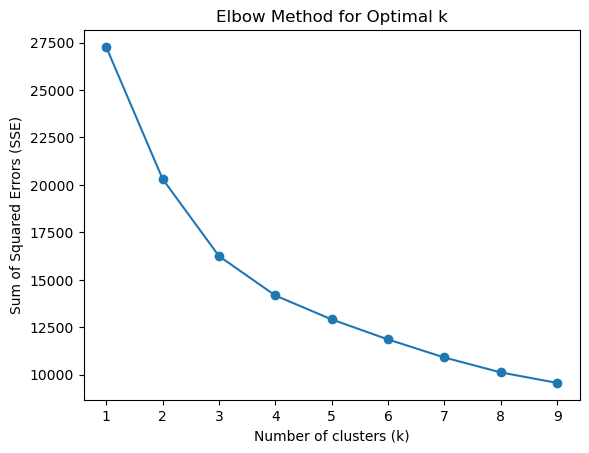

Silhouette Score for k=4 clusters: 0.214

Cluster centroids (mean feature values) for each cluster:
   avg_natural_space  avg_entertainment  avg_art_related  avg_food_spaces  \
0           3.142936           1.744589         2.044848         1.376106   
1           1.444952           2.078455         2.788095         2.646660   
2           2.426606           2.606564         2.365679         2.038773   
3           1.637452           2.020001         2.057005         1.904399   

   reviewed_average  
0          2.010016  
1          2.139710  
2          2.398341  
3          1.894602  

Inferences:

Cluster 0:
- avg_natural_space: 3.14
- avg_entertainment: 1.74
- avg_art_related: 2.04
- avg_food_spaces: 1.38
- reviewed_average: 2.01

Cluster 1:
- avg_natural_space: 1.44
- avg_entertainment: 2.08
- avg_art_related: 2.79
- avg_food_spaces: 2.65
- reviewed_average: 2.14

Cluster 2:
- avg_natural_space: 2.43
- avg_entertainment: 2.61
- avg_art_related: 2.37
- avg_food_spaces: 2.04
- rev

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print(f""" Output Timestamp: {datetime.now()} \n""")

# Select relevant features for clustering
features = df_user_travel_reviews[['avg_natural_space', 'avg_entertainment', 'avg_art_related', 'avg_food_spaces', 'reviewed_average']]

# Drop rows with NaN or zeros (assuming zeros mean "no data" or not meaningful)
features = features[(features != 0).all(axis=1)].dropna()

# Standardize features to have mean=0 and std=1 for fair clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Use the Elbow Method to find optimal number of clusters by plotting SSE (Sum of Squared Errors)
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on elbow plot, we select k=4 clusters (for example)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Assign cluster labels back to original dataframe (only rows that were used)
df_user_travel_reviews.loc[features.index, 'user_cluster'] = clusters

# Calculate and print silhouette score to evaluate clustering quality
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score for k={k} clusters: {sil_score:.3f}")
# Silhouette closer to 1 means well-separated clusters, closer to 0 means overlapping

# Analyze cluster centroids in original feature scale to interpret clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features.columns)
print("\nCluster centroids (mean feature values) for each cluster:")
print(centroids_df)

# Inferences:
print("\nInferences:")
for i, row in centroids_df.iterrows():
    print(f"\nCluster {i}:")
    print(f"- avg_natural_space: {row['avg_natural_space']:.2f}")
    print(f"- avg_entertainment: {row['avg_entertainment']:.2f}")
    print(f"- avg_art_related: {row['avg_art_related']:.2f}")
    print(f"- avg_food_spaces: {row['avg_food_spaces']:.2f}")
    print(f"- reviewed_average: {row['reviewed_average']:.2f}")


# Assign cluster labels back to original dataframe (only rows that were used)
df_user_travel_reviews.loc[features.index, 'user_cluster'] = clusters

# Count users per cluster
cluster_counts = df_user_travel_reviews['user_cluster'].value_counts().sort_index()
print("\nNumber of users in each cluster:")
print(cluster_counts)

##### **Observation:**

Cluster 0 : Users in this cluster likely prefer Natural Spaces and have overall low reviewed average meaning their reviews are mostly dis-satisfied related. Number of Users in this Category / Cluster are lowest compare to other 3 clusters

Cluster 1 : This Group Prefer Art & Food related Spaces. Low Review in Natural Space suggest that they dont prefer natural space

Cluster 2 : User has generally Balanced Interest across all category with little less into the Food Space meaning they could be picky in the food choices or doesn't like to eat out.

Cluster 3 : This cluster of users are generally less satisfied in all the categories and most likely prefer to give -ve reviews. Also this cluster has the highest number of users meaning More users give -ve Reviews compare to Positive.

#### 12. Linear Regression of Average Review by Categories of Places

 Output Timestamp: 2025-06-20 21:57:52.591675 

avg_natural_space: intercept = 1.9021, slope = 0.0949
avg_entertainment: intercept = 1.1968, slope = 0.4244
avg_art_related: intercept = 1.7285, slope = 0.1615
avg_food_spaces: intercept = 1.8052, slope = 0.1468


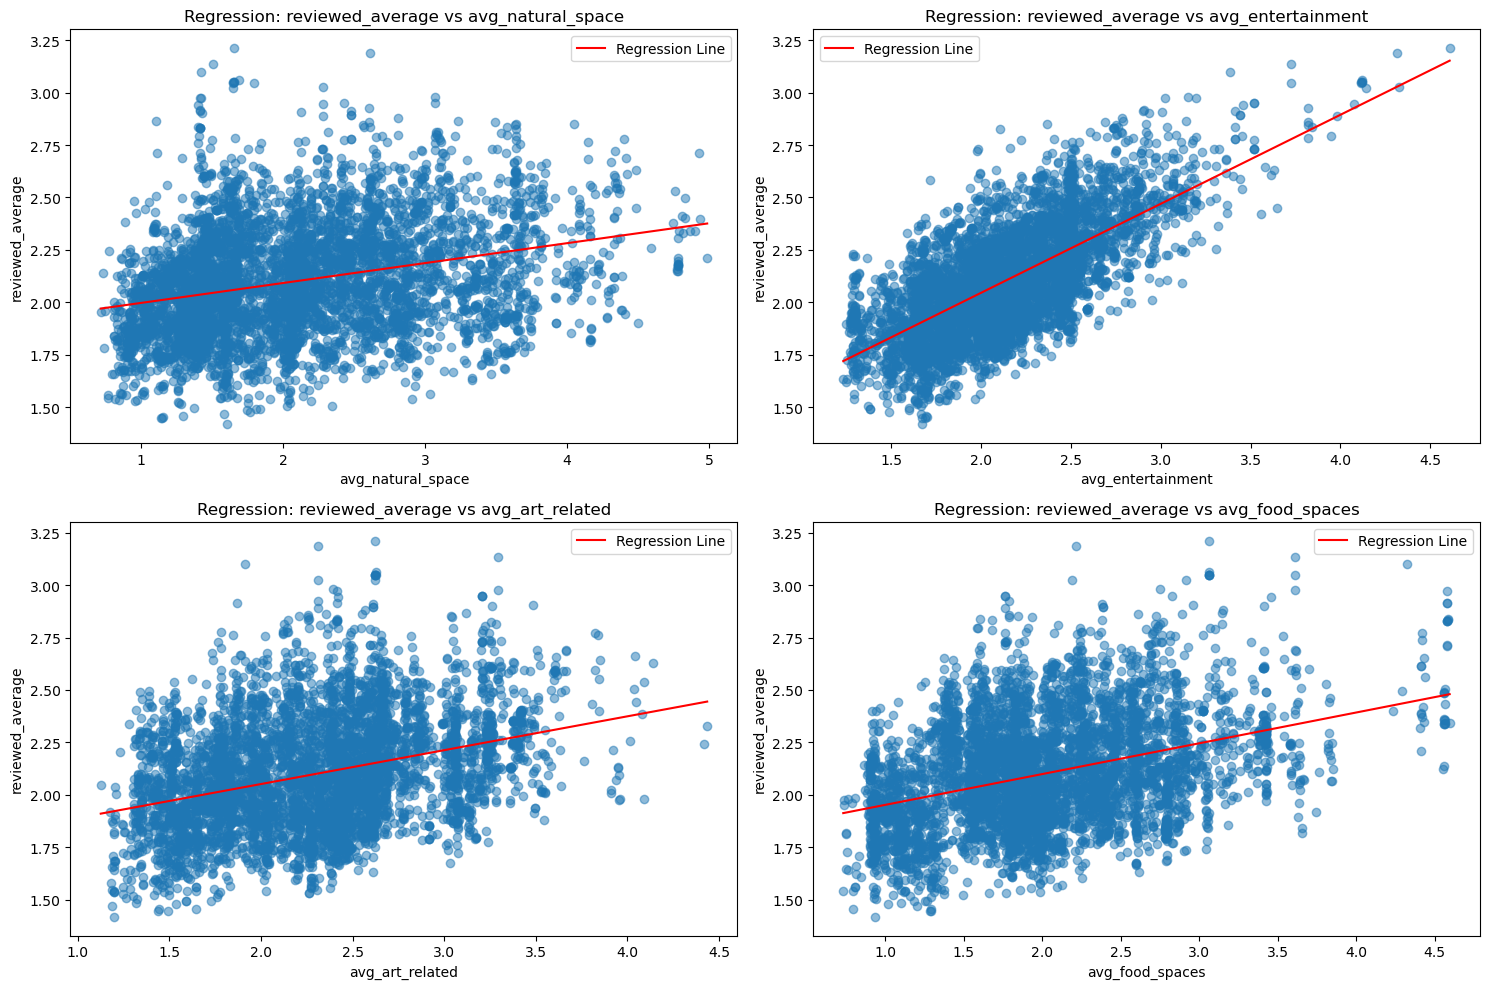

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print(f""" Output Timestamp: {datetime.now()} \n""")

features = ['avg_natural_space', 'avg_entertainment', 'avg_art_related', 'avg_food_spaces']
target = 'reviewed_average'

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(features):
    X = df_user_travel_reviews[[feature]]
    y = df_user_travel_reviews[target]

    model = LinearRegression().fit(X, y)

    print(f"{feature}: intercept = {model.intercept_:.4f}, slope = {model.coef_[0]:.4f}")


    # Predict line
    x_line = np.linspace(X.min().values[0], X.max().values[0], 100).reshape(-1, 1)
    y_line = model.predict(x_line)

    # Plot
    axs[i].scatter(X, y, alpha=0.5)
    axs[i].plot(x_line, y_line, color='red', label='Regression Line')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)
    axs[i].legend()
    axs[i].set_title(f'Regression: {target} vs {feature}')

plt.tight_layout()
plt.show()


##### **Observation:** 

From the above it seems that Entertainment Category has a strongest Impact on Average Reviews compare to other categories and the weakest is the Natural Places which is visible from the Slope Values.

#### 13. Classification of User Group/Cluster based on Reviews in each Categories

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print(f""" Output Timestamp: {datetime.now()} \n""")

features = ['avg_natural_space', 'avg_entertainment', 'avg_art_related', 'avg_food_spaces']
X = df_user_travel_reviews[features]
y = df_user_travel_reviews['user_cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


 Output Timestamp: 2025-06-20 21:57:57.917301 

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       218
         1.0       0.96      0.94      0.95       248
         2.0       0.94      0.95      0.95       269
         3.0       0.96      0.96      0.96       356

    accuracy                           0.96      1091
   macro avg       0.96      0.96      0.96      1091
weighted avg       0.96      0.96      0.96      1091



##### **Observation:**

From above, we can see that we have 96% Accuracty and similar F1-Score and Recall in this Model and it indicates it performing really well. 

#### 14. In Section 12, we realized that Entertainment category has the significant impact on the overall average review. Performing Bootstrapping to estimate Confidence Interval (Non-Parametric) on Entertainment Category by resampling users and also performing Hypothesis Testing to see if gender has any influence on this category

In [192]:
# Example: Bootstrap CI for avg_entertainment
n_iterations = 1000
boot_means = []

sample = df_user_travel_reviews['avg_entertainment'].dropna().values

for _ in range(n_iterations):
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    boot_means.append(np.mean(boot_sample))

ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)

print(f"Bootstrapped CI for avg_entertainment: ({ci_lower:.2f}, {ci_upper:.2f})")

Bootstrapped CI for avg_entertainment: (2.12, 2.14)


In [194]:
male_scores = df_user_travel_reviews[df_user_travel_reviews['gender'] == 'Male']['avg_entertainment'].dropna()
female_scores = df_user_travel_reviews[df_user_travel_reviews['gender'] == 'Female']['avg_entertainment'].dropna()

# Observed difference
obs_diff = male_scores.mean() - female_scores.mean()

# Bootstrap
boot_diffs = []
for _ in range(1000):
    boot_male = np.random.choice(male_scores, size=len(male_scores), replace=True)
    boot_female = np.random.choice(female_scores, size=len(female_scores), replace=True)
    boot_diffs.append(np.mean(boot_male) - np.mean(boot_female))

# P-value
p_val = np.mean(np.abs(boot_diffs) >= abs(obs_diff))
print(f"Bootstrapped p-value for gender difference: {p_val:.3f}")


Bootstrapped p-value for gender difference: 0.688


##### **Observation:** 

The Average Entertainment Category rating is statistically likely to lie between 2.12 and 2.14 across users with 95% confidence. Also this narrow interval in CI - Lower & Upper suggests that data is consistent and sample size is large enough.

Since the p-value is > 0.05, it kinds of highlight that that is no statistically signifanct difference in rating given by Gender Male or Female on the Entertainment Category




In [195]:
df_user_travel_reviews.columns.tolist()

['userid',
 'first_name',
 'last_name',
 'email',
 'age',
 'gender',
 'country',
 'churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoos',
 'restaurants',
 'pubs/bars',
 'local services',
 'burger/pizza shops',
 'hotels/other lodgings',
 'juice bars',
 'art galleries',
 'dance clubs',
 'swimming pools',
 'gyms',
 'bakeries',
 'beauty & spas',
 'cafes',
 'view points',
 'monuments',
 'gardens',
 'age_group',
 'avg_natural_space',
 'avg_entertainment',
 'avg_art_related',
 'avg_food_spaces',
 'reviewed_average',
 'reviewed_ci_lower',
 'reviewed_ci_upper',
 'ci_score',
 'user_cluster']

#### 15. Get top 10 users details in each Category to Target for Reviews & Opportunities

In [205]:
# Get top 10 users overall likely to give best entertainment reviews
top_entertainment_users = (
    df_user_travel_reviews
    .dropna(subset=['user_cluster', 'avg_entertainment'])
    .query('avg_entertainment > 0')
    .sort_values('avg_entertainment', ascending=False)
    .head(10)
)

print("\nTop 10 users most likely to give high entertainment reviews (across all clusters):")
display(top_entertainment_users[['userid', 'first_name', 'last_name', 'email', 'user_cluster', 'avg_entertainment']])



Top 10 users most likely to give high entertainment reviews (across all clusters):


,userid,first_name,last_name,email,user_cluster,avg_entertainment
607,User 608,William,Parsons,harrysimmons@example.org,2.0,4.608333
1333,User 1334,Bernard,Sanchez,paul97@example.org,2.0,4.328333
1332,User 1333,Shawn,Martinez,wjohnson@example.org,2.0,4.314286
608,User 609,Nancy,Williams,moranlisa@example.com,2.0,4.143333
602,User 603,Brooke,Peters,phillipsdanielle@example.net,2.0,4.120000
604,User 605,Lisa,Castillo,danielscynthia@example.com,2.0,4.118333
605,User 606,Evan,Cox,april86@example.org,2.0,4.118333
606,User 607,James,Brown,beth40@example.org,2.0,4.116667
603,User 604,Vickie,Anderson,charles46@example.com,2.0,4.116667
1344,User 1345,Julie,Massey,timothy46@example.net,2.0,4.074286


In [204]:
# Get top 10 users overall likely to give best Natural Space reviews
top_nature_users = (
    df_user_travel_reviews
    .dropna(subset=['user_cluster', 'avg_natural_space'])
    .query('avg_natural_space > 0')
    .sort_values('avg_natural_space', ascending=False)
    .head(10)
)

print("\nTop 10 users most likely to give high Natural Space reviews (across all clusters):")
display(top_nature_users[['userid', 'first_name', 'last_name', 'email', 'user_cluster', 'avg_natural_space']])



Top 10 users most likely to give high Natural Space reviews (across all clusters):


,userid,first_name,last_name,email,user_cluster,avg_natural_space
2848,User 2851,Kathleen,Haynes,samuelcarter@example.net,0.0,4.988
960,User 961,Julie,Ferguson,chandlerallison@example.net,0.0,4.934
951,User 952,Annette,Drake,jessicagalloway@example.net,2.0,4.930
2833,User 2836,Kara,James,ayersandrea@example.com,0.0,4.900
4605,User 4608,Michaela,Sandoval,paynecaroline@example.com,0.0,4.866
2832,User 2835,Martha,Wise,tara96@example.org,0.0,4.834
1865,User 1867,Mike,Tucker,brose@example.com,0.0,4.830
2831,User 2834,Darlene,Willis,alexis53@example.org,0.0,4.820
953,User 954,Steven,Silva,qmoreno@example.com,0.0,4.808
1866,User 1868,Jennifer,Poole,aprilwalters@example.org,0.0,4.792


In [206]:
# Get top 10 users overall likely to give best Art Space reviews
top_art_users = (
    df_user_travel_reviews
    .dropna(subset=['user_cluster', 'avg_art_related'])
    .query('avg_art_related > 0')
    .sort_values('avg_art_related', ascending=False)
    .head(10)
)

print("\nTop 10 users most likely to give high Art Space reviews (across all clusters):")
display(top_art_users[['userid', 'first_name', 'last_name', 'email', 'user_cluster', 'avg_art_related']])



Top 10 users most likely to give high Art Space reviews (across all clusters):


,userid,first_name,last_name,email,user_cluster,avg_art_related
389,User 390,Matthew,Morales,chenamy@example.org,1.0,4.4350
516,User 517,Cindy,Trevino,clarkgeorge@example.com,0.0,4.4150
980,User 981,Chad,Bailey,mathewwhite@example.net,1.0,4.1400
394,User 395,Alyssa,Osborne,hurleynoah@example.com,2.0,4.0925
395,User 396,Christopher,Rodriguez,parkjennifer@example.net,1.0,4.0900
574,User 575,Christopher,Sanchez,phillipsdavid@example.com,1.0,4.0800
581,User 582,Andrew,Hill,yharris@example.org,1.0,4.0450
582,User 583,Francisco,Harris,grimesscott@example.com,1.0,4.0400
272,User 273,Jean,Sharp,ucarter@example.com,1.0,4.0375
427,User 428,Lori,Mcclure,deborahhopkins@example.com,1.0,4.0150


In [207]:
# Get top 10 users overall likely to give best Food Space reviews
top_food_users = (
    df_user_travel_reviews
    .dropna(subset=['user_cluster', 'avg_food_spaces'])
    .query('avg_food_spaces > 0')
    .sort_values('avg_food_spaces', ascending=False)
    .head(10)
)

print("\nTop 10 users most likely to give high Food Space reviews (across all clusters):")
display(top_food_users[['userid', 'first_name', 'last_name', 'email', 'user_cluster', 'avg_food_spaces']])



Top 10 users most likely to give high Food Space reviews (across all clusters):


,userid,first_name,last_name,email,user_cluster,avg_food_spaces
1559,User 1561,Brent,White,lisaanderson@example.net,1.0,4.5950
652,User 653,Brian,Williams,jamesmejia@example.org,1.0,4.5825
658,User 659,Becky,Mckenzie,erikakeith@example.com,1.0,4.5825
661,User 662,Alyssa,Hartman,bowerscheryl@example.com,2.0,4.5800
665,User 666,Fernando,Powell,burchantonio@example.org,2.0,4.5800
663,User 664,Amanda,Howard,allisonblack@example.com,1.0,4.5800
662,User 663,Jessica,Chen,barronmichael@example.net,1.0,4.5800
664,User 665,Paul,Oconnor,laurenfinley@example.org,2.0,4.5800
660,User 661,Scott,Gomez,justinbean@example.org,1.0,4.5800
659,User 660,Justin,White,brobles@example.org,1.0,4.5800
